In [1]:
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import os as os
import matplotlib.pyplot as plt
import csv as csv
from datetime import datetime
import time
from scipy.stats import linregress
from sklearn import datasets
from config import OMWeather_API
import pprint

In [2]:
# randomly generate a list of lats and longs
# numpy.random.uniform(low=0.0, high=1.0, size=None)
lat = np.random.uniform(low=-90.00, high=90.00, size=600)
lon = np.random.uniform(low=-180.00, high=180.00, size=600)

In [3]:
latlong = zip(lat, lon)

In [4]:
# Use citipy to generate the a list of the closest cities to your random coordinates. 
cities = []
for c in latlong:
    cities.append(citipy.nearest_city(c[0], c[1]))

In [5]:
city_name=[]
for city in cities:
    name = city.city_name
    city_name.append(name)

In [7]:
# Use Openweather api to get the weather data needed from those cities.
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []
country = []
date = []

# Loop through cities making the API call
i = 1
for city in city_name:
    city=city
    query_url = url + "appid=" + OMWeather_API + "&q=" + city
    response = requests.get(query_url).json()
    
    # extracting data and cleaning data
# print cleaned data
    try:
        
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temps.append(response["main"]['temp'])
        humid.append(response["main"]['humidity'])
        lats.append(response["coord"]["lat"])  
        lons.append(response["coord"]["lon"])
        winds.append(response["wind"]["speed"])
        names.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City name not found.")




# Build query URL
#for city in city_name:
    #query_url = url + "appid=" + First_Weather_Key + "&q=" + city + "&units=imperial"
    #response = requests.get(query_url)
    #if response.status_code == 200:
        #response = response.json()
        #temps.append(response["main"]["temp"])
        #humid.append(response["main"]["humidity"])
        #clouds.append(response["clouds"]["all"])
        #winds.append(response["wind"]["speed"])
        #lats.append(response["coord"]["lat"])
        #lons.append(response["coord"]["lon"])
        #names.append(response["name"])
        #country.append(response["sys"]["country"])
        #date.append(response["dt"])
        #print(f' Processing city information:{city}|{city_name}" + "\n")
        
   

Processing record 1|coquimbo
Processing record 2|poltavka
Processing record 3|mozarlandia
Processing record 4|te anau
Processing record 5|vengerovo
Processing record 6|hermanus
Processing record 7|albany
Processing record 8|bluff
Processing record 9|khatanga
Processing record 10|dunedin
Processing record 11|riachao das neves
Processing record 12|provideniya
Processing record 13|punta arenas
City name not found.
Processing record 14|vaini
Processing record 15|kalmunai
Processing record 16|busselton
Processing record 17|mitchell
Processing record 18|cape town
Processing record 19|ushuaia
Processing record 20|punta arenas
Processing record 21|fortuna
Processing record 22|saint george
Processing record 23|albany
Processing record 24|upernavik
Processing record 25|busselton
Processing record 26|kaitangata
Processing record 27|tasiilaq
Processing record 28|ribeira grande
Processing record 29|buesaco
Processing record 30|tuktoyaktuk
City name not found.
Processing record 31|tasiilaq
Processin

Processing record 254|thompson
Processing record 255|busselton
Processing record 256|rikitea
City name not found.
Processing record 257|brownwood
Processing record 258|castro
Processing record 259|togur
Processing record 260|tagusao
Processing record 261|nouakchott
City name not found.
City name not found.
Processing record 262|faya
Processing record 263|villazon
Processing record 264|matagami
Processing record 265|ushuaia
Processing record 266|nome
Processing record 267|sao filipe
Processing record 268|muros
Processing record 269|pevek
Processing record 270|lorengau
City name not found.
Processing record 271|la ronge
Processing record 272|saint george
Processing record 273|bluff
Processing record 274|marzuq
Processing record 275|tilichiki
Processing record 276|acapulco
Processing record 277|rikitea
Processing record 278|castro
Processing record 279|barrow
Processing record 280|ushuaia
Processing record 281|hobart
City name not found.
Processing record 282|ushuaia
Processing record 283

Processing record 502|bredasdorp
Processing record 503|ushuaia
Processing record 504|walvis bay
Processing record 505|sao filipe
Processing record 506|huarmey
Processing record 507|kieta
Processing record 508|porto seguro
City name not found.
Processing record 509|perth
Processing record 510|atuona
Processing record 511|thompson
Processing record 512|east london
Processing record 513|kapaa
Processing record 514|busselton
Processing record 515|skibbereen
Processing record 516|avarua
City name not found.
Processing record 517|kruisfontein
Processing record 518|richards bay
Processing record 519|ushuaia
Processing record 520|avarua
Processing record 521|le port
Processing record 522|port alfred
Processing record 523|mar del plata
Processing record 524|mataura
Processing record 525|florianopolis
Processing record 526|atuona
Processing record 527|barrow
Processing record 528|kapaa
Processing record 529|albany
Processing record 530|crotone
Processing record 531|kolaras
Processing record 532|

In [8]:
weather = pd.DataFrame({"City": names,
                        "Country": country,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather.head()

,City,Country,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Coquimbo,CL,288.15,87,59,4.10,-29.95,-71.34
1,Poltavka,RU,265.16,88,100,6.58,54.37,71.76
2,Mozarlandia,BR,297.34,79,3,1.58,-14.74,-50.57
3,Te Anau,NZ,286.96,53,32,1.15,-45.42,167.72
4,Vengerovo,RU,260.75,93,100,6.89,55.68,76.75


In [9]:
len(weather)

555

Export data to csv file for VacationPy

In [10]:
#Exporting data to csv file (will be used for vacation challenge as well)
weather.to_csv("city_list_weather_vacation.csv")

#Display DF
weather.head()

,City,Country,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Coquimbo,CL,288.15,87,59,4.10,-29.95,-71.34
1,Poltavka,RU,265.16,88,100,6.58,54.37,71.76
2,Mozarlandia,BR,297.34,79,3,1.58,-14.74,-50.57
3,Te Anau,NZ,286.96,53,32,1.15,-45.42,167.72
4,Vengerovo,RU,260.75,93,100,6.89,55.68,76.75


Scatter Plots for WeatherPy

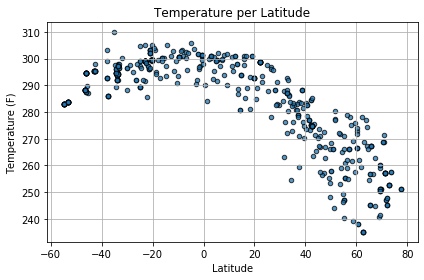

In [11]:
#  df.plot.scatter(x='a', y='b');

weather.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('Temp_perLat.png')
plt.show()

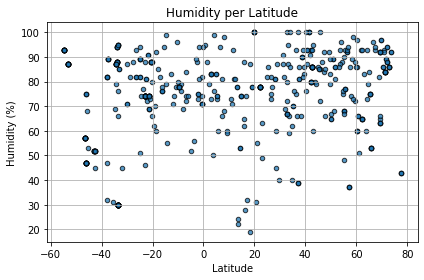

In [12]:
# Humidity (%) vs. Latitude
weather.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('HumidityperLat.png')
plt.show()

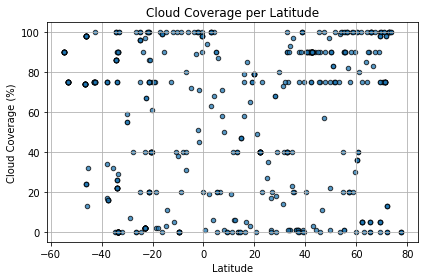

In [13]:
#  Cloudiness (%) vs. Latitude
weather.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('CloudperLat.png')
plt.show()

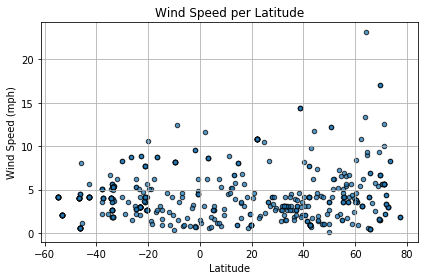

In [14]:
#  Wind Speed (mph) vs. Latitude
weather.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('WindperLat.png')
plt.show()

Weather Analysis

Analysis 1: Yes, the temperature does increase significantly between -20 degrees and approx latitude 25 degrees.

Analysis 2: The wind speed seems to drop slightly as well. Lower wind speeds can make a hot climate feel even hotter. This may be based on the time of the year. Since at least latitudes 0 to 90 degrees is currently experiencing spring/early summer.

Analysis 3: The humidity seems to decrease for some areas the further away you get from the equator (0 degrees latitude). Maybe because temperature makes water evaporate? More analysis would be needed to find out why.

Start Northern and Southern Hemisphere Regression models

R squard: -0.2315446790614365


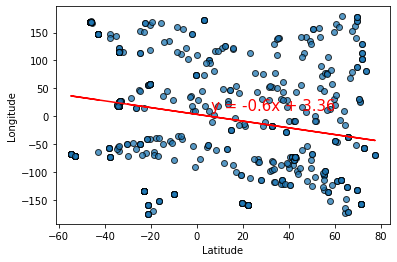

In [15]:
## Convert to floats and store as x and y values
x_values = weather['Latitude'].astype('float')
y_values = weather['Longitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,alpha=.75, edgecolors="k")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Temperature (F) vs. Latitude Linear Regression

In [44]:
northern = weather.loc[weather["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather.loc[weather["Latitude"] < 0.0]
southern.reset_index(inplace=True)

In [59]:
#Northern Hemispere for Temperature Regression
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata,alpha=.75, edgecolors="k")
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)


# Show plot
plt.show()

The r-squared is: -0.8650645484965378


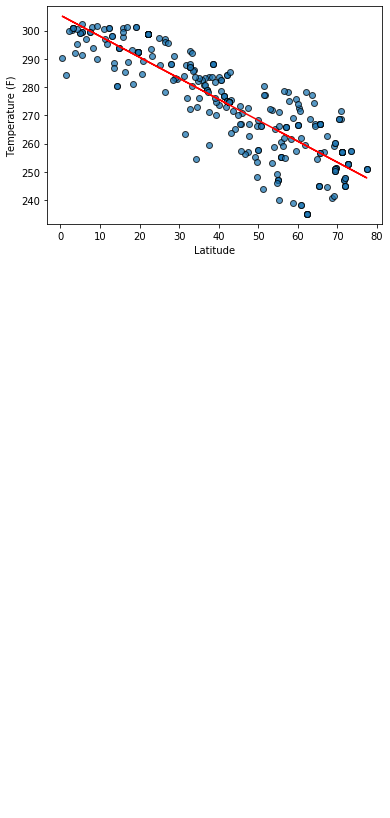

In [60]:
xlbl = "Latitude"
ylbl = "Temperature (F)"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)
plt.savefig('Temp_perNorthRegression.png')

The r-squared is: 0.7192637068380676


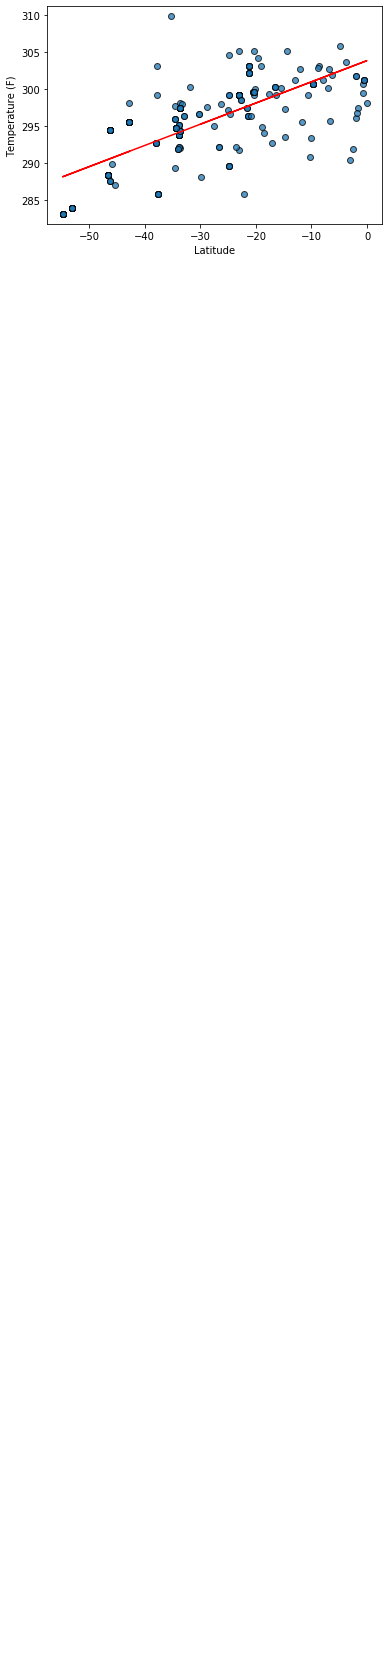

In [61]:
#Souther Hemispere for Temperature Regression


xlbl = "Latitude"
ylbl = "Temperature (F)"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig('Temp_perSouthRegression.png')
# Show plot
plt.show()

Humidity (%) vs. Latitude Linear Regression by Hemishere

The r-squared is: 0.10486782565790277


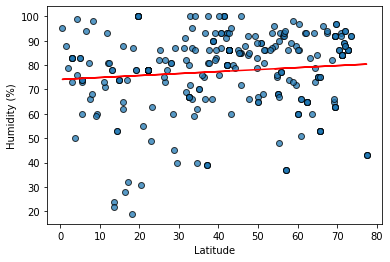

In [62]:

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Humidity_perNorthRegression.png')
# Show plot
plt.show()

The r-squared is: 0.15189526586929852


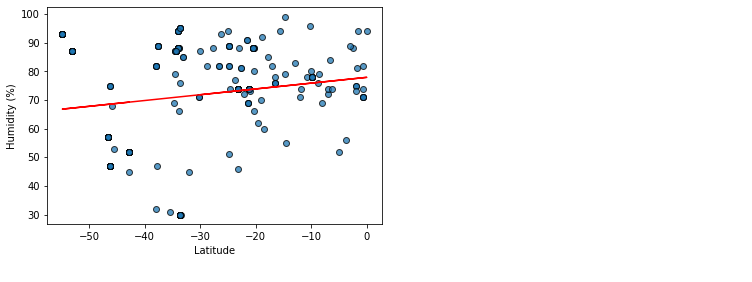

In [63]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Humidity_perSouthRegression.png')
# Show plot
plt.show()

Cloudiness (%) vs. Latitude Linear Regression by Hemishere

The r-squared is: 0.19121930597649753


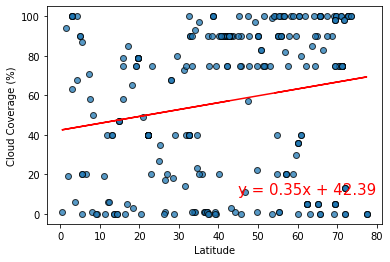

In [64]:

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloud Coverage (%)"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Cloudiness_perLatRegression.png')
# Show plot
plt.show()

The r-squared is: -0.17901821019994738


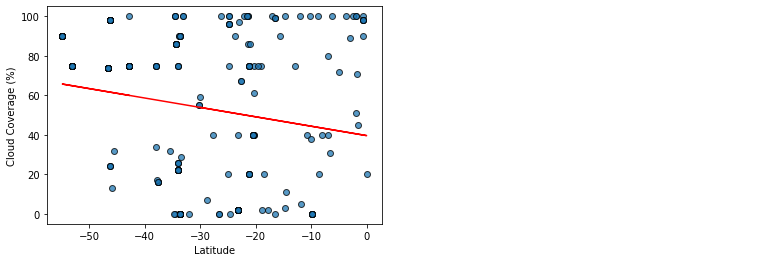

In [65]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloud Coverage (%)"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Cloudiness_perSouthRegression.png')
# Show plot
plt.show()

Wind Speed (mph) vs. Latitude Linear Regression by Hemishere

The r-squared is: 0.029607340462508954


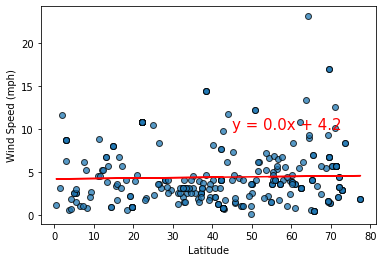

In [66]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Wind_perNorthRegression.png')
# Show plot
plt.show()

The r-squared is: 0.19638138733511343


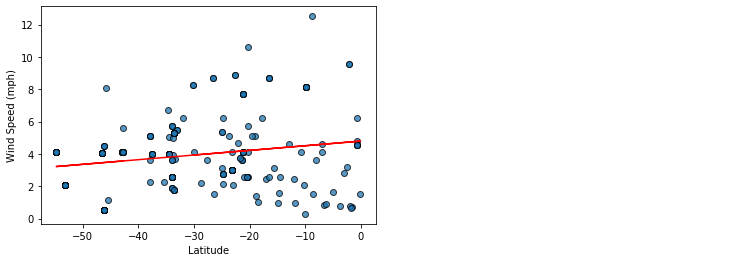

In [67]:
# Souther Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Wind_perSouthRegression.png')
# Show plot
plt.show()

Observations

As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases.

It seems that there is no correlation between humidity and latitude.

Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic